In [42]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('../data/preproc_kdd_train.csv')
df.sample(5)

,duration,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_tcp,protocol_udp,attack_type
96476,-0.221617,-1.106658,-0.813914,-1.082990,-0.869111,-0.089486,-0.007736,-0.095076,-0.027023,0,...,0.06,0.07,0.00,0.07,0.07,0.00,0.00,1,0,neptune
3447,0.733543,-0.700486,0.782064,1.511190,0.767487,-0.089486,-0.007736,-0.095076,-0.027023,1,...,1.00,0.00,0.00,0.36,0.04,0.01,0.02,1,0,normal
61430,-0.221617,1.323938,0.782064,0.771168,1.839210,-0.089486,-0.007736,-0.095076,-0.027023,1,...,1.00,0.00,0.17,1.00,0.00,0.00,0.00,1,0,normal
31490,-0.221617,-1.106290,-0.813914,-1.082990,-0.869111,-0.089486,-0.007736,-0.095076,-0.027023,0,...,0.07,0.06,0.00,0.02,0.08,0.00,0.00,1,0,neptune
13992,-0.221617,1.323938,0.782064,0.845994,1.322606,-0.089486,-0.007736,-0.095076,-0.027023,1,...,1.00,0.00,0.12,1.00,0.00,0.01,0.05,1,0,normal


In [44]:
X = df.drop(columns=['attack_type'], inplace=False)
distorsions = []
for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, random_state=24)
  kmeans.fit(X)
  distorsions.append(kmeans.inertia_)

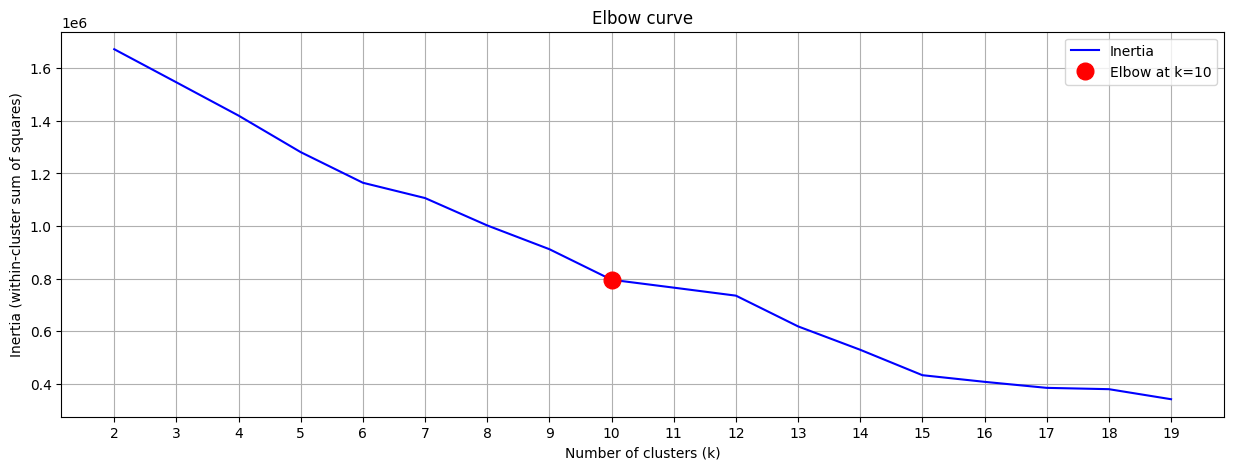

Optimal number of clusters (elbow point): k=10


In [ ]:
# Method 1: Elbow method using the "kneedle" algorithm (distance from line)
# Find the point with maximum distance from the line connecting first and last points
def find_elbow(values):
    # Normalize the values
    n_points = len(values)
    all_coords = np.vstack((range(n_points), values)).T
    first_point = all_coords[0]
    last_point = all_coords[-1]
    
    # Vector from first to last point
    line_vec = last_point - first_point
    line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))
    
    # Vector from first point to each point
    vec_from_first = all_coords - first_point
    
    # Distance from each point to the line
    scalar_product = np.sum(vec_from_first * line_vec_norm, axis=1)
    vec_to_line = vec_from_first - np.outer(scalar_product, line_vec_norm)
    dist_to_line = np.sqrt(np.sum(vec_to_line**2, axis=1))
    
    # Find the index with maximum distance
    elbow_idx = np.argmax(dist_to_line)
    return elbow_idx

elbow_idx = find_elbow(distorsions)
optimal_k = elbow_idx + 2  # +2 because we started at k=2

# Plotting
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, 'b-', label='Inertia')
plt.plot(optimal_k, distorsions[elbow_idx], 'ro', markersize=12, label=f'Elbow at k={optimal_k}')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.xticks(range(2, 20))
plt.legend()
plt.show()